In [15]:
from mdagent import MDAgent

In [16]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-07-26
time: 11:39:38


In [17]:
descriptive_prompt_7 = "Complete the following MD tasks: 1. Download the PDB file for 1MBN. 2. Preprocess the file by adding missing atoms and replacing non-standard residues. 3. Simulate for 1 ps at 300 K and 400 K. 4. Calculate the RMSD for each simulation. 5. Analyze the secondary structure for each simulation."
non_descriptive_prompt_7 = "Simulate PDB ID 1MBN at two different temperatures: 300K, 400K for 1 ps each. Plot RMSD of both over time, and compare the final secondary structures at the end of the simulations. "

In [18]:
llm_model = "gpt-4o-2024-05-13"
tools = "all"

In [19]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

##### descriptive prompt

In [20]:
start1 = datetime.datetime.now()
agent_1.run(descriptive_prompt_7)

Thought: I need to complete a series of molecular dynamics tasks step-by-step. First, I will download the PDB file for 1MBN.

Action: 
```
{
  "action": "PDBFileDownloader",
  "action_input": "1MBN"
}
```PDB file found with this ID: 1MBN
I need to preprocess the downloaded PDB file by adding missing atoms and replacing non-standard residues.

Action:
```
{
  "action": "CleaningToolFunction",
  "action_input": {
    "pdb_id": "1MBN_113953",
    "replace_nonstandard_residues": true,
    "add_missing_atoms": true,
    "remove_heterogens": false,
    "remove_water": false,
    "add_hydrogens": false
  }
}
```file path: /Users/quinny/repos/md-agent/ckpt/ckpt_7/pdb/1MBN_raw_20240726_113953.pdb
I need to set up and run the simulations for 1 ps at 300 K and 400 K. I will start with the simulation at 300 K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1MBN_113956",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod

('Agent stopped due to iteration limit or time limit.', 'YNYBY4R7')

In [21]:
end = datetime.datetime.now()
elapsed = end - start1
print(f"agent_1 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_1 duration: 2.43 minutes


In [22]:
registry = agent_1.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1MBN_113953, 1MBN_113956, 1MBN_114005, 1MBN_114015, 1MBN_114029, 1MBN_114047, top_sim0_114051, sim0_114051, rec0_114052, rec1_114052, rec2_114052, top_sim0_114133, sim0_114133, rec0_114133, rec1_114133, rec2_114133, rmsd_114051, fig0_114210, rmsd_114133, fig0_114213, rec0_114215


In [23]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_113953: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_113953
 1MBN_113956: Cleaned File:  Replaced Nonstandard Residues. Missing Atoms Added and replaces nonstandard residues. 
 1MBN_114005: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 1MBN_114015: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 1MBN_114029: Cleaned File:  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 1MBN_114047: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_114051: Initial positions for simulation sim0_114051
 sim0_114051: Basic Simulation of Protein 1MBN_114047
 rec0_114052: Simulation trajectory for protein 1MBN_114047 an

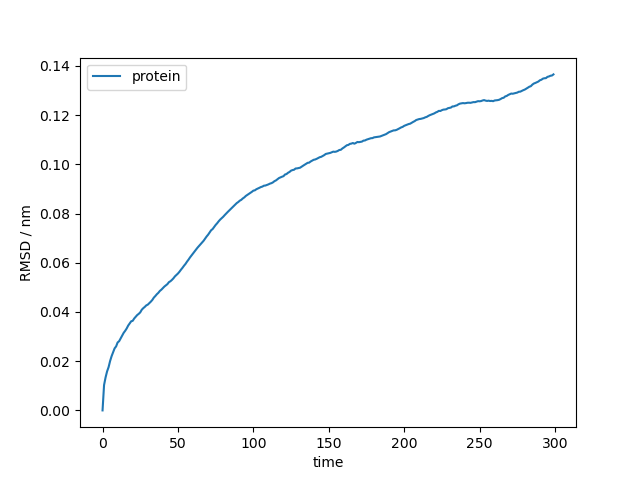

In [25]:
#plotting rmsd of both simulations
from IPython.display import Image
rmsd1ID = 'fig0_114210'
rmsd2ID = 'fig0_114213'
path1 = registry.get_mapped_path(rmsd1ID)
path2 = registry.get_mapped_path(rmsd2ID)

Image(filename=path1)

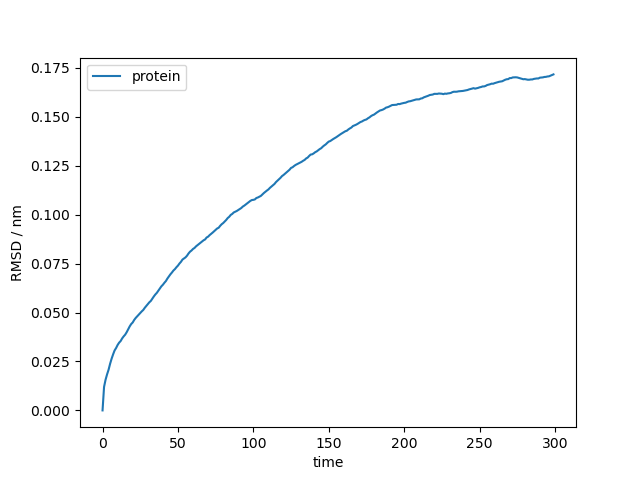

In [26]:
Image(filename=path2)

In [ ]:
# note: it fails to do DSSP before it timed out, so we don't analyze those here

##### non-descriptive prompt

In [29]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-07-27
time: 06:25:21


In [30]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [31]:
start2 = datetime.datetime.now()
agent_2.run(non_descriptive_prompt_7)

Thought: To address the question, I need to perform the following steps:
1. Download the PDB file for 1MBN.
2. Set up and run two separate simulations at 300K and 400K for 1 ps each.
3. Compute the RMSD for both simulations over time.
4. Compare the final secondary structures at the end of the simulations.

First, I will download the PDB file for 1MBN.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1MBN"
}
```PDB file found with this ID: 1MBN
Next, I need to set up and run two separate simulations for the PDB ID 1MBN at 300K and 400K for 1 ps each. I will start with the simulation at 300K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1MBN_062531",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false,
      "solvate": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "

('I have successfully completed the simulations and analyses for the PDB ID 1MBN at two different temperatures (300K and 400K). Here are the detailed results:\n\n1. **Simulations**:\n   - **300K**: Simulation trajectory and state log saved.\n   - **400K**: Simulation trajectory and state log saved.\n\n2. **RMSD Calculations**:\n   - **300K**: RMSD calculated and saved to CSV (file ID: rmsd_062542). Plot saved (plot ID: fig0_062655).\n   - **400K**: RMSD calculated and saved to CSV (file ID: rmsd_062613). Plot saved (plot ID: fig0_062658).\n\n3. **Secondary Structure Analysis (DSSP)**:\n   - **300K**: \n     - Helix: 33776\n     - Strand: 0\n     - Coil: 12124\n   - **400K**: \n     - Helix: 33001\n     - Strand: 0\n     - Coil: 12899\n\n### Summary and Comparison:\n- **RMSD Plots**:\n  - The RMSD plots for both temperatures show the structural deviations over time. The plots can be used to visually compare the stability and conformational changes of the protein at different temperature

In [32]:
end = datetime.datetime.now()
elapsed = end - start2
print(f"agent_2 duration: {elapsed.total_seconds()/60:.2f} minutes")

agent_2 duration: 1.69 minutes


In [33]:
registry = agent_2.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1MBN_062531, 1MBN_062539, top_sim0_062542, sim0_062542, rec0_062543, rec1_062543, rec2_062543, top_sim0_062613, sim0_062613, rec0_062614, rec1_062614, rec2_062614, rmsd_062542, fig0_062655, rmsd_062613, fig0_062658, rec0_062700, rec0_062702


In [34]:
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_062531: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_062531
 1MBN_062539: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_062542: Initial positions for simulation sim0_062542
 sim0_062542: Basic Simulation of Protein 1MBN_062539
 rec0_062543: Simulation trajectory for protein 1MBN_062539 and simulation sim0_062542
 rec1_062543: Simulation state log for protein 1MBN_062539 and simulation sim0_062542
 rec2_062543: Simulation pdb frames for protein 1MBN_062539 and simulation sim0_062542
 top_sim0_062613: Initial positions for simulation sim0_062613
 sim0_062613: Basic Simulation of Protein 1MBN_062539
 rec0_062614: Simulation trajectory for protein 1MBN_062539 and simulation sim0_062613
 rec1_062614: Simulation state log for protein 1MBN_062539 and simulation sim0_062613
 rec2_062614: Simulation pdb frames for protein 1MBN_0625

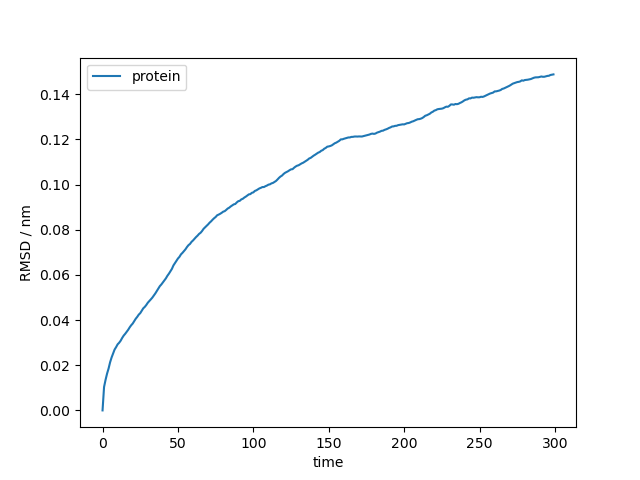

In [35]:
#plotting rmsd of both simulations
from IPython.display import Image
rmsd1ID = 'fig0_062655'
rmsd2ID = 'fig0_062658'
path1 = registry.get_mapped_path(rmsd1ID)
path2 = registry.get_mapped_path(rmsd2ID)

Image(filename=path1)

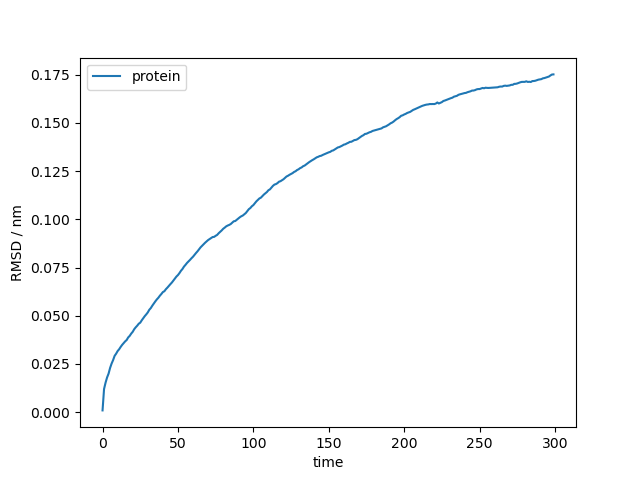

In [36]:
Image(filename=path2)

In [37]:
import mdtraj as md
import numpy as np

traj_path = registry.get_mapped_path("rec0_062543")
top_path = registry.get_mapped_path("top_sim0_062542")
traj = md.load(traj_path, top=top_path)

# Compute the secondary structure of the trajectory
dssp_final = md.compute_dssp(traj[-1], simplified=True)
dssp_initial = md.compute_dssp(traj[0], simplified=True)

print('Computing DSSP for 1MBN at 300K')

print('=== BEFORE ===')
print("Number of initial sheets: ",len([i for i in dssp_initial[0] if i == 'E']))
print("Number of initial helices: ",len([i for i in dssp_initial[0] if i == 'H']))
print("Number of initial coils: ",len([i for i in dssp_initial[0] if i == 'C']))

print('=== AFTER ===')
print("Number of final sheets: ",len([i for i in dssp_final[0] if i == 'E']))
print("Number of final helices: ",len([i for i in dssp_final[0] if i == 'H']))
print("Number of final coils: ",len([i for i in dssp_final[0] if i == 'C']))

Computing DSSP for 1MBN at 300K
=== BEFORE ===
Number of initial sheets:  0
Number of initial helices:  117
Number of initial coils:  36
=== AFTER ===
Number of final sheets:  0
Number of final helices:  112
Number of final coils:  41


In [38]:
import mdtraj as md
import numpy as np

traj_path = registry.get_mapped_path("rec0_062614")
top_path = registry.get_mapped_path("top_sim0_062613")
traj = md.load(traj_path, top=top_path)

# Compute the secondary structure of the trajectory
dssp_final = md.compute_dssp(traj[-1], simplified=True)
dssp_initial = md.compute_dssp(traj[0], simplified=True)

print('Computing DSSP for 1MBN at 400K')

print('=== BEFORE ===')
print("Number of initial sheets: ",len([i for i in dssp_initial[0] if i == 'E']))
print("Number of initial helices: ",len([i for i in dssp_initial[0] if i == 'H']))
print("Number of initial coils: ",len([i for i in dssp_initial[0] if i == 'C']))

print('=== AFTER ===')
print("Number of final sheets: ",len([i for i in dssp_final[0] if i == 'E']))
print("Number of final helices: ",len([i for i in dssp_final[0] if i == 'H']))
print("Number of final coils: ",len([i for i in dssp_final[0] if i == 'C']))

Computing DSSP for 1MBN at 400K
=== BEFORE ===
Number of initial sheets:  0
Number of initial helices:  118
Number of initial coils:  35
=== AFTER ===
Number of final sheets:  0
Number of final helices:  112
Number of final coils:  41
